## 1.0 Introduction
PedalPredict is a machine learning-based project designed to forecast bike rental demand accurately. The primary goal is to equip bike rental businesses with actionable insights to optimize bike availability, reduce wait times, and enhance overall user satisfaction.

## 2.0 Business Understanding

### 2.1 Problem
Bike rental businesses struggle with balancing supply and demand, particularly during peak hours or special events. This imbalance can lead to bike shortages, causing user frustration and operational inefficiencies. These challenges can negatively impact the user experience, leading to lost revenue and dissatisfied customers.

### 2.2 Aim
The aim of PedalPredict is to address the supply-demand imbalance by accurately forecasting bike rental demand. By doing so, the project seeks to improve resource management and enhance the overall user experience in bike-sharing systems.

### 2.3 Objectives

- Forecast Demand: Predict the number of bikes needed at different times and locations to meet user demand efficiently.
- Optimize Resource Allocation: Ensure optimal distribution of bikes across various stations to match predicted demand, reducing shortages and surpluses.
- Enhance User Experience: Minimize wait times and increase bike availability, thereby improving user satisfaction and convenience.
- Support City Planning: Provide data-driven insights to city planners to help in infrastructure development and traffic management.

## 3.0 Data Understanding

### 3.1 Data Collection

The data for this project was obtained from Kaggle, an online platform that provides a wide variety of datasets for data science and machine learning projects. Two datasets are used in this project to forecast bike rental demand:

1. Training Data:
The training dataset includes historical records of bike rentals. It contains the response variable, count, which represents the total number of bicycles rented during specific time slots. This data is crucial for training the machine learning model to recognize patterns and make predictions.

2. Test Data:
The test dataset shares the same structure as the training data but does not include the response variable (count). The objective is to predict the number of bike rentals in each time slot using the trained model, based on the features provided in the test dataset.

### 3.2 Data Description

The variables in the Datasets are as follows:
- id: A unique identifier for each time slot (not sequential or related to time order).
- year: The year of the record (2011 or 2012).
- hour: The hour of the day (ranging from 0 to 23).
- season: The season of the year, encoded as 1 for winter, 2 for spring, 3 for summer, and 4 for autumn.
- holiday: A binary indicator of whether the day was a holiday (1 if yes, 0 if no).
- workingday: A binary indicator of whether the day was a working day, excluding holidays and weekends (1 if yes, 0 if no).
- weather: A categorical variable representing the weather condition, ranging from 1 (best weather) to 4 (worst weather).
- temp: The recorded temperature in degrees Celsius.
- atemp: The perceived or "feels-like" temperature in degrees Celsius.
- humidity: The relative humidity percentage.
- windspeed: The wind speed measured in kilometers per hour (km/h).
- count: The total number of bike rentals in each time slot (only available in the training set).

## 4.0 Data Preprocessing

### 4.1 Loading Libraries

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model Selection and Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### 4.2 Loading Data

In [3]:
#read the train data
df_train = pd.read_csv(r"C:\Users\Brian Nyagah\Desktop\Data Science\projects\Bike Demand Forecast\Notebooks\Dataset\train.csv")
df_train.head(5)

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,3,2012,23,3,0,0,2,23.78,27.275,73,11.0014,133
1,4,2011,8,3,0,0,1,27.88,31.820,57,0.0000,132
2,5,2012,2,1,0,1,1,20.50,24.240,59,0.0000,19
3,7,2011,20,3,0,1,3,25.42,28.790,83,19.9995,58
4,8,2011,17,3,0,1,3,26.24,28.790,89,0.0000,285


In [4]:
#read the test data
df_test = pd.read_csv(r"C:\Users\Brian Nyagah\Desktop\Data Science\projects\Bike Demand Forecast\Notebooks\\Dataset\test.csv")
df_test.head(5)

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,2012,21,3,0,0,1,29.52,34.850,79,6.0032
1,2,2012,3,2,0,0,1,23.78,27.275,83,0.0000
2,6,2011,10,1,0,1,3,16.40,20.455,0,11.0014
3,14,2012,19,1,0,1,1,13.94,15.150,46,19.9995
4,17,2011,23,3,0,1,2,26.24,30.305,73,11.0014


### 4.3 Dataset Information

In [5]:
#check the info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          7689 non-null   int64  
 1   year        7689 non-null   int64  
 2   hour        7689 non-null   int64  
 3   season      7689 non-null   int64  
 4   holiday     7689 non-null   int64  
 5   workingday  7689 non-null   int64  
 6   weather     7689 non-null   int64  
 7   temp        7689 non-null   float64
 8   atemp       7689 non-null   float64
 9   humidity    7689 non-null   int64  
 10  windspeed   7689 non-null   float64
 11  count       7689 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 721.0 KB


- From this we can conclude that there are no missing values (all entries are 7689)
- We have 12 columns with 9 having an integer data type and 3 having a float data type


### 4.4 Descriptive Exploration

In [6]:
#check the description
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7689.0,5463.266224,3144.709810,3.00,2771.0000,5477.000,8186.0000,10886.0000
year,7689.0,2011.495513,0.500012,2011.00,2011.0000,2011.000,2012.0000,2012.0000
hour,7689.0,11.565353,6.915777,0.00,6.0000,12.000,18.0000,23.0000
season,7689.0,2.506178,1.115935,1.00,2.0000,3.000,4.0000,4.0000
holiday,7689.0,0.029002,0.167824,0.00,0.0000,0.000,0.0000,1.0000
workingday,7689.0,0.677331,0.467528,0.00,0.0000,1.000,1.0000,1.0000
weather,7689.0,1.410066,0.628004,1.00,1.0000,1.000,2.0000,3.0000
temp,7689.0,20.267085,7.824066,0.82,13.9400,20.500,26.2400,41.0000
atemp,7689.0,23.696581,8.514199,0.76,16.6650,24.240,31.0600,45.4550
humidity,7689.0,61.771492,19.302151,0.00,46.0000,62.000,77.0000,100.0000


**1.** Hourly Distribution: The rentals are fairly evenly distributed throughout the day, with a slight peak around midday.

**2.** Seasonal Impact: Rentals are spread across all seasons, with no single season dominating.

**3.** Holiday and Working Days: There is a focus on regular operational days.

**4.** Weather Conditions: The majority of the data comes from days with favorable weather, which likely correlates with higher rental demand.

**5.** Temperature and Humidity: The dataset captures a wide range of temperatures and humidity levels, providing a comprehensive view of different weather conditions.


### 4.5 Shape of Dataset

In [10]:
df_train.shape
print(f"The data set has {df_train.shape[0]} rows and {df_train.shape[1]} columns")

The data set has 7689 rows and 12 columns


## 5.0 Exploratory Data Analysis

### 5.1 Correlation

In [33]:
#check the correlation
corr = df_train.corr()
corr.round(3)

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
id,1.000,-0.007,-0.003,-0.007,-0.013,0.018,-0.005,-0.001,-0.003,-0.000,-0.006,-0.003
year,-0.007,1.000,-0.004,-0.013,0.004,-0.001,-0.017,0.069,0.066,-0.076,-0.021,0.262
hour,-0.003,-0.004,1.000,-0.009,0.008,0.005,-0.036,0.141,0.136,-0.292,0.155,0.404
season,-0.007,-0.013,-0.009,1.000,0.026,-0.009,0.009,0.260,0.267,0.193,-0.155,0.156
holiday,-0.013,0.004,0.008,0.026,1.000,-0.250,0.002,-0.006,-0.011,0.002,0.011,-0.010
workingday,0.018,-0.001,0.005,-0.009,-0.250,1.000,0.036,0.045,0.039,-0.005,0.008,0.020
weather,-0.005,-0.017,-0.036,0.009,0.002,0.036,1.000,-0.061,-0.060,0.402,0.004,-0.126
temp,-0.001,0.069,0.141,0.260,-0.006,0.045,-0.061,1.000,0.985,-0.062,-0.022,0.397
atemp,-0.003,0.066,0.136,0.267,-0.011,0.039,-0.060,0.985,1.000,-0.040,-0.061,0.392
humidity,-0.000,-0.076,-0.292,0.193,0.002,-0.005,0.402,-0.062,-0.040,1.000,-0.322,-0.325


- temp and atemp have an almost perfect positive correlation.

- count and hour have a moderate positive correlation. This suggests that certain hours, likely during commute times, see higher demand for bike rentals.

- count and temp have a moderate positive correlation suggesting that warmer temperatures likely encourage more people to rent bikes.

- count and atemp shows a moderate positive correlation with bike rentals.

- humidity and count have a moderate negative correlation indicating that higher humidity may discourage bike riding.

- humidity and hour also have a moderate negative correlation.

- The count variable is most strongly positively correlated with hour, temp, and atemp, and negatively correlated with humidity.

### 5.2 Relationships

C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

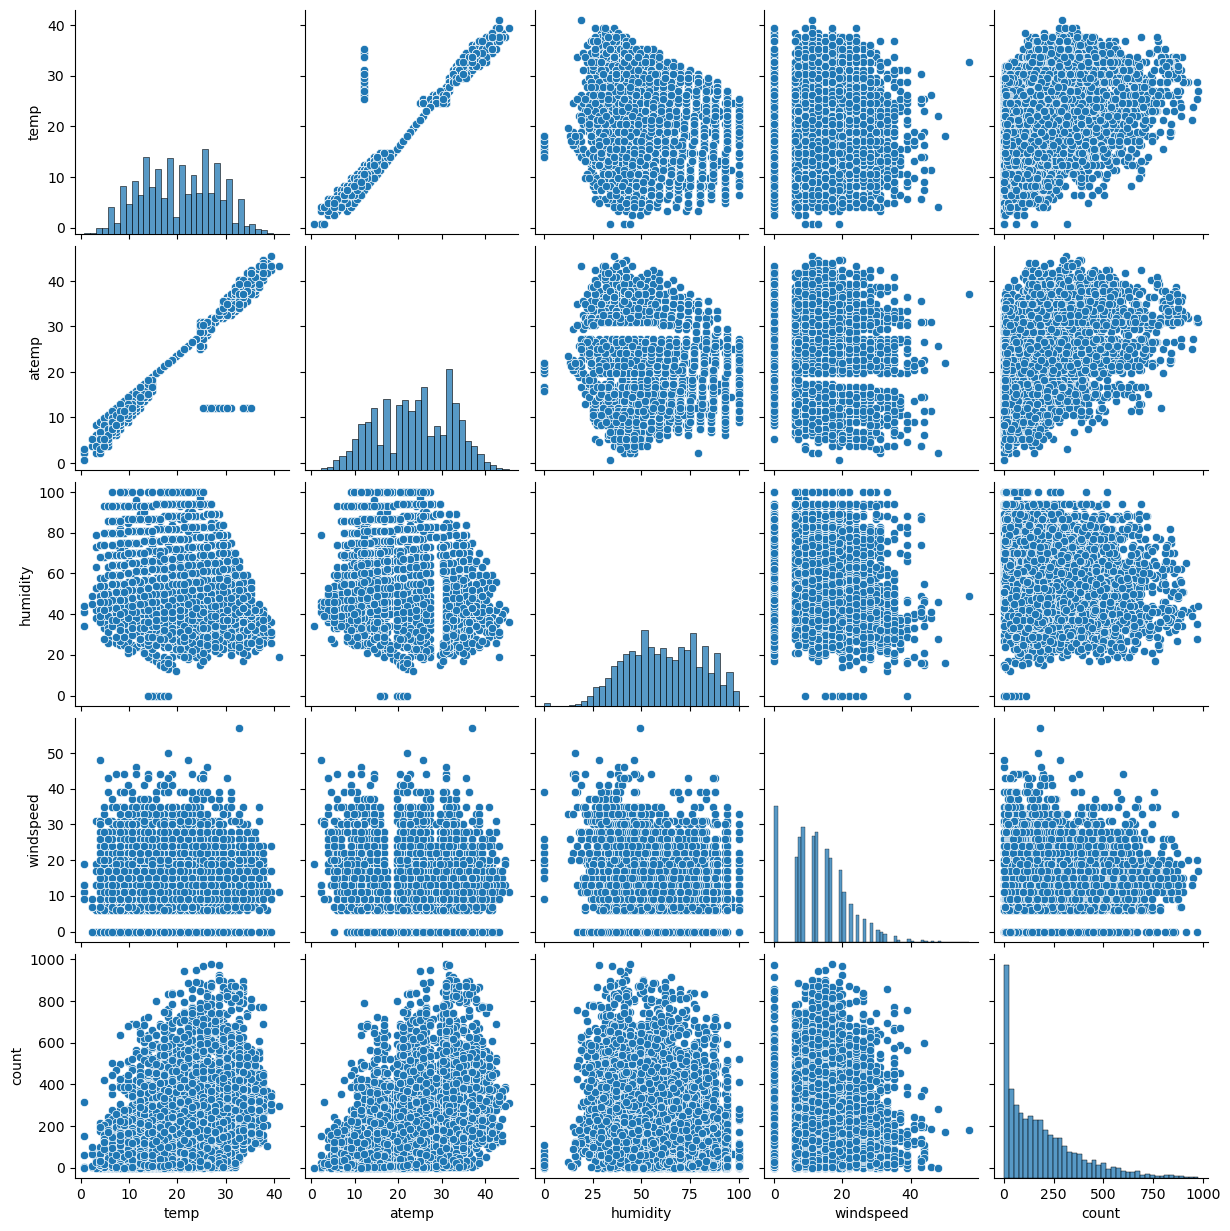

In [41]:
#check the relationship
sns.pairplot(df_train[['temp', 'atemp', 'humidity', 'windspeed', 'count']]);

### 5.3 Time Series Analysis

C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


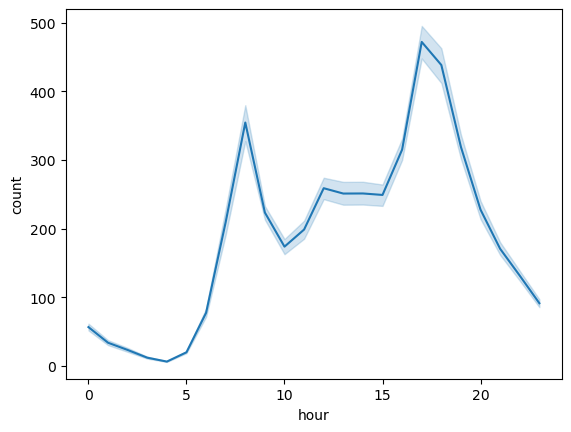

In [37]:
#line plot for hour
sns.lineplot(x = 'hour', y = 'count', data = df_train);

C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


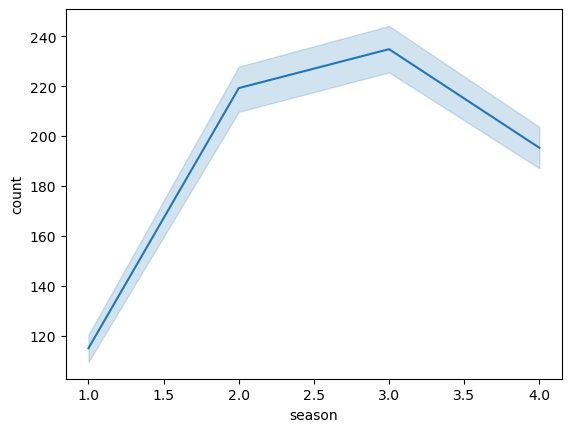

In [38]:
#line plot for season
sns.lineplot(x = 'season', y = 'count', data = df_train);